# Predicting City Rent Index From Building Construction Permits

### Rent index of a city reflects the rent price level in a city, the project is to predict the rent index in a city from publicly accessible data.  

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from sklearn.linear_model import LinearRegression
matplotlib.rcParams['figure.dpi'] = 120

### Los Angeles and Chicago are used as examples, rent index data is from Zillow, which represents the average rent price level in a city. First we may consider that the rent price level is closely related to population, economy etc.

In [2]:
# rent index from Zillow
rent_LA=pd.read_csv("LA_rent.csv")
rent_CHI=pd.read_csv("CHI_rent.csv")

### Rent in Los Angeles has been continuously increasing over the past few years. The population has been increasing linearly in recent years. We can see the rent price trend aligns well with the population growth trend. 

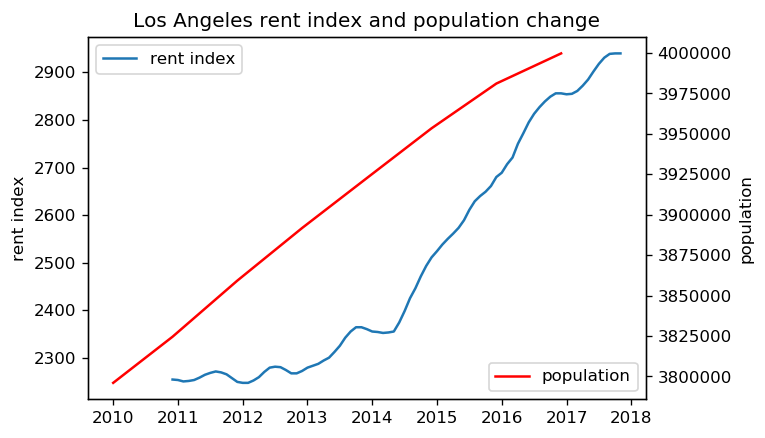

In [3]:
# population data from http://worldpopulationreview.com/us-cities/los-angeles-population/
population_LA = [3796060, 3824592, 3859267, 3891783, 3922668, 3953459, 3981116, 3999759]
rent_2010_2017_LA = []
for i in range(5,89):
    rent_2010_2017_LA.append(int(''.join(c for c in rent_LA.iloc[1][i] if c.isdigit())))
fig, ax = plt.subplots()
ax.plot(range(11,95),rent_2010_2017_LA)
ax.set_ylabel('rent index')
ax.legend(['rent index'],loc=2)
ax2 = ax.twinx()
ax2.plot([0, 11, 23, 35, 47, 59, 71, 83],population_LA, color = 'r')
ax2.set_ylabel('population')
ax2.tick_params(axis='y')
ax2.legend(['population'],loc=4)
plt.xticks(range(0,97,12), ['2010', '2011', '2012', '2013', '2014' , '2015' , '2016', '2017', '2018'])
plt.title('Los Angeles rent index and population change')
plt.show()

### The population in Chicago reaches maxium in 2014, then started to drop. The rent price index was increasing from 2011 to 2015, then fluctuates around 1700 since 2015. 

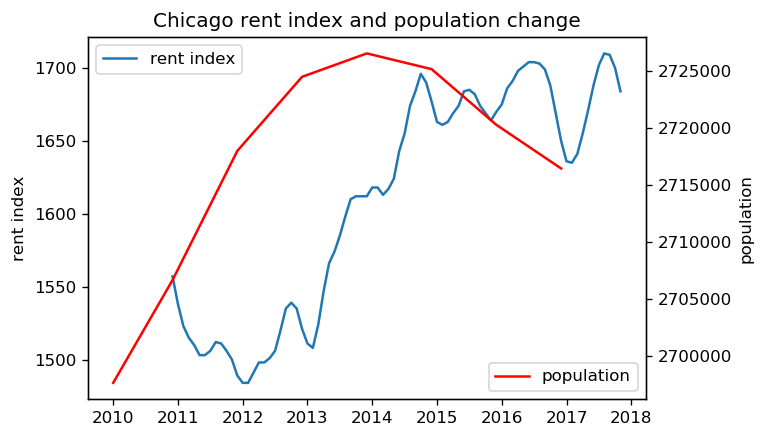

In [4]:
#population data from http://worldpopulationreview.com/us-cities/chicago-population/
population_CHI = [2697661, 2706670, 2717989, 2724482, 2726533, 2725154, 2720275, 2716450]
rent_2010_2017_CHI = []
for i in range(5,89):
    rent_2010_2017_CHI.append(int(''.join(c for c in rent_CHI.iloc[1][i] if c.isdigit())))
fig, ax = plt.subplots()
ax.plot(range(11,95),rent_2010_2017_CHI)
ax.set_ylabel('rent index')
ax.legend(['rent index'],loc=2)
ax2 = ax.twinx()
ax2.plot([0, 11, 23, 35, 47, 59, 71, 83],population_CHI, color = 'r')
ax2.set_ylabel('population')
ax2.tick_params(axis='y')
ax2.legend(['population'],loc=4)
plt.xticks(range(0,97,12), ['2010', '2011', '2012', '2013', '2014' , '2015' , '2016', '2017', '2018'])
plt.title('Chicago rent index and population change')
plt.show()

### Rent price index often fluctuates over time, it's correlated to the local population data to some extent in the above two examples, but there are a few problems:  the fluctuation in every month is hard to be captured from population data; there's latency in the population data. Such a problem also exists for economy data.

### The Department of Building and Safety in local city issues permits for the construction, remodeling, and repair of buildings and structures and the permits are categorized into different types. These events can reflects the needs for apartment in the local city, thus might be correlated to the rent price level. 

In [5]:
df_LA=pd.read_csv("Building_Permits_LA.csv",low_memory=False)
df_CHI=pd.read_csv("Building_Permits_CHI.csv",low_memory=False)

In [6]:
df_LA["Issue Date"]=pd.to_datetime(df_LA["Issue Date"])
df_CHI["         ISSUE_DATE"]=pd.to_datetime(df_CHI["         ISSUE_DATE"])

In [7]:
df_LA.head()

,Assessor Book,Assessor Page,Assessor Parcel,Tract,Block,Lot,Reference # (Old Permit #),PCIS Permit #,Status,Status Date,...,Occupancy,Floor Area-L.A. Building Code Definition,Census Tract,Latitude/Longitude,Zip Codes,Census Tracts,Precinct Boundaries,LA Specific Plans,Council Districts,Neighborhood Councils (Certified)
0,5437,020,013,TR 4178,NaN,108,NaN,13041-90000-00001,Permit Finaled,01/18/2013 12:00:00 AM,...,NaN,0.0,1871.00,"(34.11245, -118.26232)",23670.0,391.0,450.0,NaN,8.0,42.0
1,2118,015,008,TR 7632,NaN,8,NaN,13044-90000-00001,Permit Finaled,01/11/2013 12:00:00 AM,...,NaN,0.0,1310.20,"(34.20359, -118.53625)",18909.0,250.0,278.0,NaN,4.0,12.0
2,2384,021,048,TR 6293,NaN,96,NaN,13042-90000-00005,Permit Finaled,04/30/2015 12:00:00 AM,...,NaN,0.0,1439.01,"(34.13638, -118.40898)",8492.0,352.0,1236.0,11.0,5.0,84.0
3,5539,026,008,DAYTON HEIGHTS TRACT,B,9,NaN,13042-90000-00002,Permit Finaled,01/07/2013 12:00:00 AM,...,NaN,0.0,1927.00,"(34.08239, -118.28575)",22721.0,455.0,507.0,NaN,8.0,58.0
4,5146,003,040,E. M. FUNK'S SUBDIVISION OF THE VALENZUELA TRACT,NaN,26,NaN,13042-90000-00007,Permit Finaled,07/17/2013 12:00:00 AM,...,NaN,0.0,2260.00,"(34.0357, -118.24511)",23082.0,703.0,1018.0,NaN,9.0,76.0


In [8]:
df_CHI.head()

,ID,PERMIT#,PERMIT_TYPE,ISSUE_DATE,ESTIMATED_COST,AMOUNT_WAIVED,AMOUNT_PAID,TOTAL_FEE,STREET_NUMBER,STREET DIRECTION,...,CONTRACTOR_15_PHONE,LATITUDE,LONGITUDE,LOCATION,Boundaries - ZIP Codes,Community Areas,Zip Codes,Census Tracts,Wards,:@computed_region_awaf_s7ux
0,1401011,100017796,PERMIT - ELEVATOR EQUIPMENT,2007-03-16,0.0,0.0,1680.0,1680.0,201,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1839834,100195670,PERMIT - ELECTRIC WIRING,2007-08-21,17040.0,0.0,40.0,40.0,444,W,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1655364,100097827,PERMIT - ELECTRIC WIRING,2006-04-07,743.0,0.0,40.0,40.0,5000,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1656480,100098521,PERMIT - SCAFFOLDING,2006-02-28,0.0,0.0,50.0,50.0,301,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1658995,100099989,PERMIT - ELECTRIC WIRING,2006-03-07,0.0,0.0,70.0,70.0,1324,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### The structures of the data in the two cities are different. Autually, although the building constrcution permits data is available for most of US cities, they often come with diffrent structures and item names. Thus the data analysis should be specific to each city. 

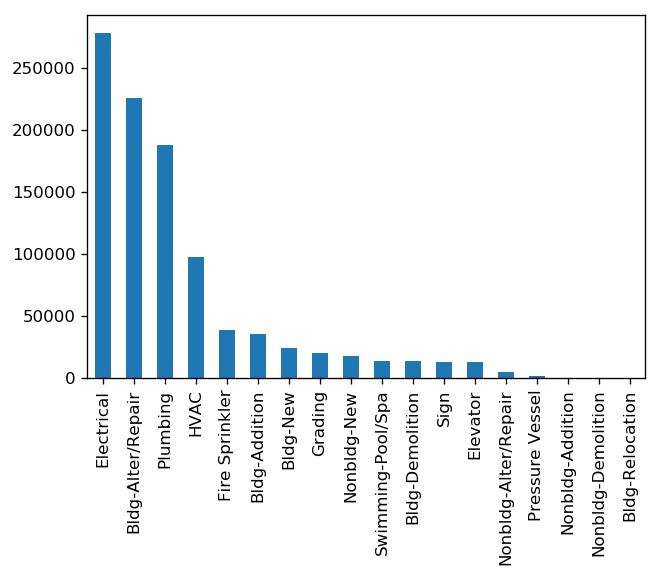

In [9]:
df_LA["Permit Type"].value_counts().plot(kind="bar")
plt.show()

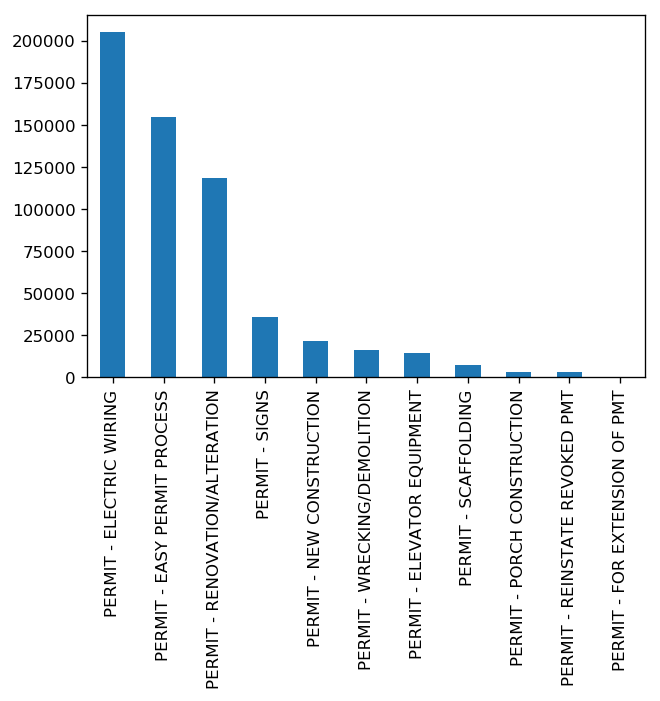

In [10]:
df_CHI["  PERMIT_TYPE"].value_counts().plot(kind="bar")
plt.show()

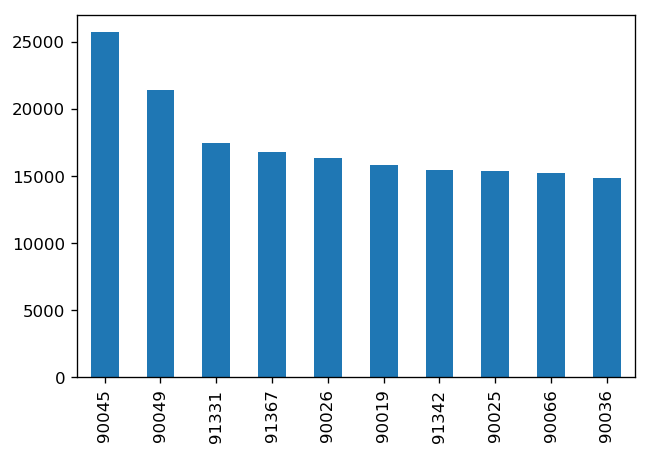

In [11]:
df_LA["Zip Code"]=df_LA["Zip Code"].fillna(0).astype(int)
df_LA["Zip Code"].value_counts().head(10).plot(kind="bar")
plt.show()

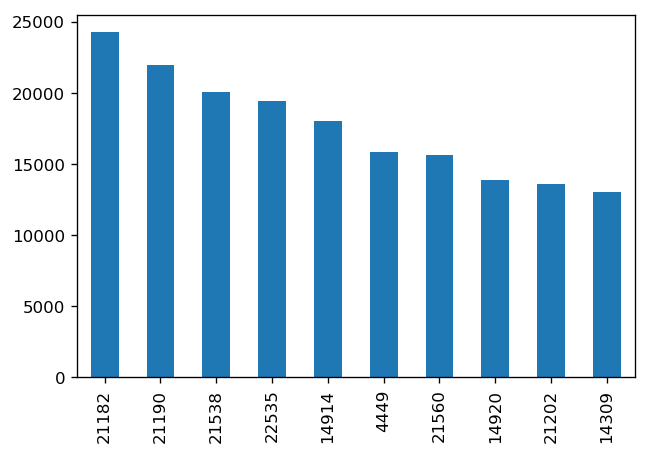

In [12]:
df_CHI["Zip Codes"]=df_CHI["Zip Codes"].fillna(0).astype(int)
df_CHI["Zip Codes"].value_counts().head(10).plot(kind="bar")
plt.show()

### Different permit compositions in different areas.  

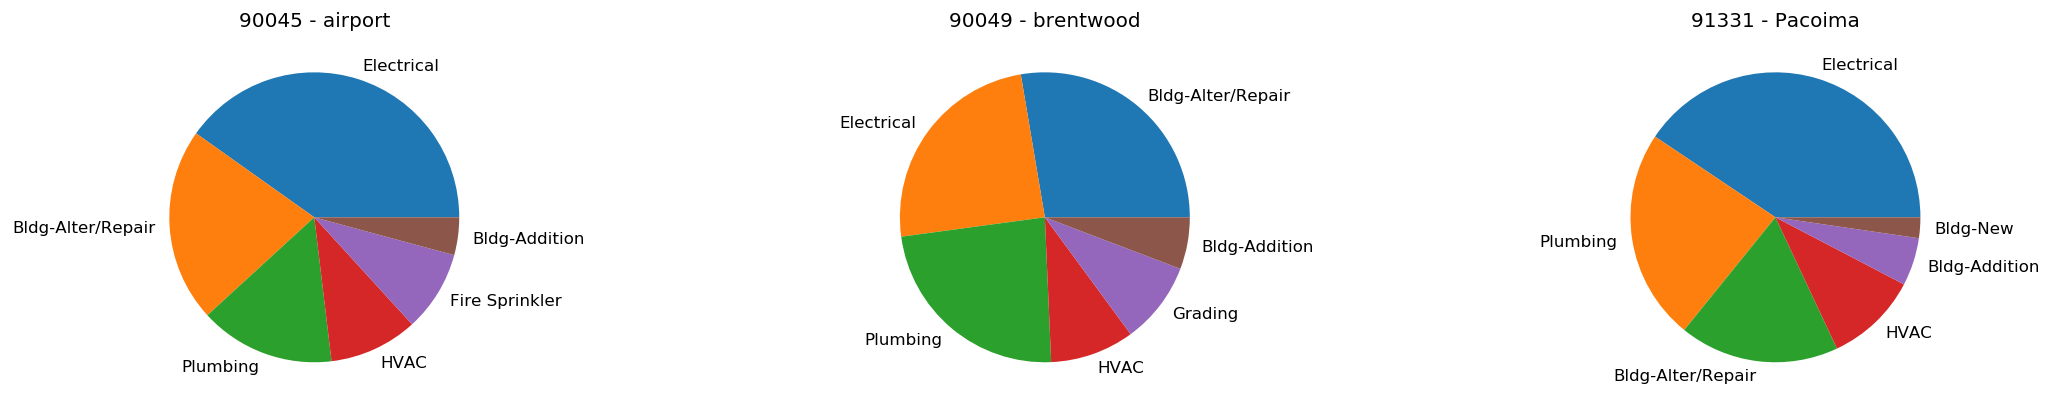

In [13]:
fig, [ax1,ax2,ax3] = plt.subplots(ncols=3)

df_LA[df_LA["Zip Code"]==90045]["Permit Type"].value_counts().head(6).plot(kind="pie",ax=ax1,title="90045 - airport")
df_LA[df_LA["Zip Code"]==90049]["Permit Type"].value_counts().head(6).plot(kind="pie",ax=ax2,title="90049 - brentwood")
df_LA[df_LA["Zip Code"]==91331]["Permit Type"].value_counts().head(6).plot(kind="pie",ax=ax3,title="91331 - Pacoima")

ax1.set_ylabel('')
ax2.set_ylabel('')
ax3.set_ylabel('')

ax1.set_aspect(1)
ax2.set_aspect(1)
ax3.set_aspect(1)

plt.subplots_adjust(right=3)
plt.show()

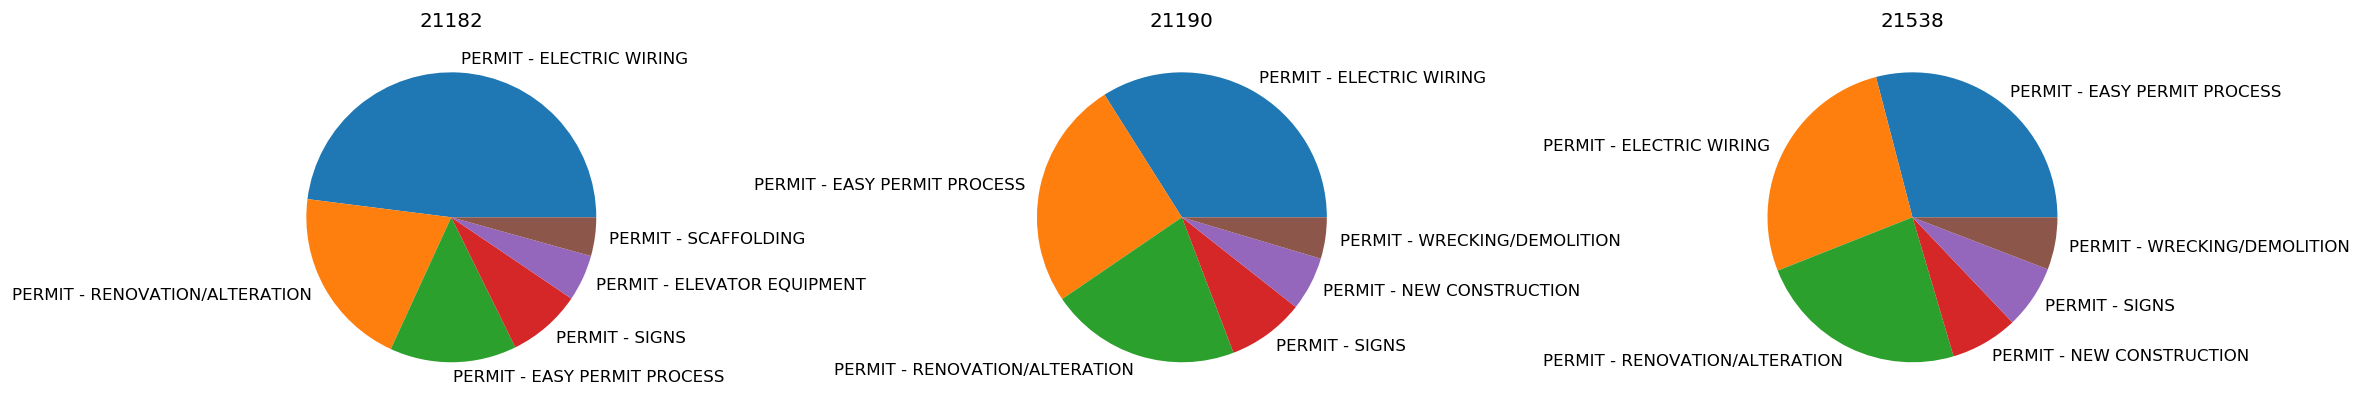

In [14]:
fig, [ax1,ax2,ax3] = plt.subplots(ncols=3)
df_CHI[df_CHI["Zip Codes"]==21182]["  PERMIT_TYPE"].value_counts().head(6).plot(kind="pie",ax=ax1,title="21182")
df_CHI[df_CHI["Zip Codes"]==21190]["  PERMIT_TYPE"].value_counts().head(6).plot(kind="pie",ax=ax2,title="21190")
df_CHI[df_CHI["Zip Codes"]==21538]["  PERMIT_TYPE"].value_counts().head(6).plot(kind="pie",ax=ax3,title="21538")
ax1.set_ylabel('')
ax2.set_ylabel('')
ax3.set_ylabel('')
ax1.set_aspect(1)
ax2.set_aspect(1)
ax3.set_aspect(1)
plt.subplots_adjust(right=3)
plt.show()

In [15]:
#rent index training set from 2013 to April 2019
LA_rent_train=[]
for i in range(29,105):
    LA_rent_train.append(int(''.join(c for c in rent_LA.iloc[1][i] if c.isdigit())))
CHI_rent_train=[]
for i in range(29,105):
    CHI_rent_train.append(int(''.join(c for c in rent_CHI.iloc[1][i] if c.isdigit())))

### Use the number of different types of permits in each month from 2013 to April 2019 as input training set.

In [16]:
permit_LA=df_LA["Permit Type"].unique()
permit_train_LA=[]
for year in range(2013,2019):
    for month in range(1,13):
        if month!=12:
            temp=df_LA[(df_LA["Issue Date"]>=datetime(year,month,1)) & (df_LA["Issue Date"]<datetime(year,month+1,1))]["Permit Type"].value_counts()
        else:
            temp=df_LA[(df_LA["Issue Date"]>=datetime(year,month,1)) & (df_LA["Issue Date"]<datetime(year+1,1,1))]["Permit Type"].value_counts()
        row=[]
        for permit in permit_LA:
            if permit in temp:
                row.append(temp[permit])
            else:
                row.append(0)
        permit_train_LA.append(row)

for month in range(1,5):
        temp=df_LA[(df_LA["Issue Date"]>=datetime(2019,month,1)) & (df_LA["Issue Date"]<datetime(2019,month+1,1))]["Permit Type"].value_counts()
        row=[]
        for permit in permit_LA:
            if permit in temp:
                row.append(temp[permit])
            else:
                row.append(0)
        permit_train_LA.append(row)
        
temp=df_LA[(df_LA["Issue Date"]>=datetime(2019,5,1)) & (df_LA["Issue Date"]<datetime(2019,6,1))]["Permit Type"].value_counts()
permit_May2019_LA=[]
row=[]
for permit in permit_LA:
    if permit in temp:
        row.append(temp[permit])
    else:
        row.append(0)
permit_May2019_LA.append(row)

In [17]:
permit_CHI=df_CHI["  PERMIT_TYPE"].unique()
permit_train_CHI=[]
for year in range(2013,2019):
    for month in range(1,13):
        if month!=12:
            temp=df_CHI[(df_CHI["         ISSUE_DATE"]>=datetime(year,month,1)) & (df_CHI["         ISSUE_DATE"]<datetime(year,month+1,1))]["  PERMIT_TYPE"].value_counts()
        else:
            temp=df_CHI[(df_CHI["         ISSUE_DATE"]>=datetime(year,month,1)) & (df_CHI["         ISSUE_DATE"]<datetime(year+1,1,1))]["  PERMIT_TYPE"].value_counts()
        row=[]
        for permit in permit_CHI:
            if permit in temp:
                row.append(temp[permit])
            else:
                row.append(0)
        permit_train_CHI.append(row)

for month in range(1,5):
        temp=df_CHI[(df_CHI["         ISSUE_DATE"]>=datetime(2019,month,1)) & (df_CHI["         ISSUE_DATE"]<datetime(2019,month+1,1))]["  PERMIT_TYPE"].value_counts()
        row=[]
        for permit in permit_CHI:
            if permit in temp:
                row.append(temp[permit])
            else:
                row.append(0)
        permit_train_CHI.append(row)
        
temp=df_CHI[(df_CHI["         ISSUE_DATE"]>=datetime(2019,5,1)) & (df_CHI["         ISSUE_DATE"]<datetime(2019,6,1))]["  PERMIT_TYPE"].value_counts()
permit_May2019_CHI=[]
row=[]
for permit in permit_CHI:
    if permit in temp:
        row.append(temp[permit])
    else:
        row.append(0)
permit_May2019_CHI.append(row)


### Machine Learning
### Linearing regression and RandomForest regression for residuals

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn import base

class residual(base.BaseEstimator, base.RegressorMixin):

    def __init__(self):
        self.base = Ridge()
        self.residual = RandomForestRegressor(max_depth = 10, n_estimators = 100)

    def fit(self, X, y=None):
        self.base = self.base.fit(X, y)
        self.residual = self.residual.fit(X, y - (self.base.predict(X)))
        return self

    def predict(self, X):
        return (self.base.predict(X))+(self.residual.predict(X))

W:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [19]:
from sklearn.pipeline import Pipeline
est_LA = Pipeline([
    ('res', residual())    
    ])
est_CHI = Pipeline([
    ('res', residual())    
    ])

In [20]:
est_LA.fit(permit_train_LA, LA_rent_train)
est_LA.score(permit_train_LA, LA_rent_train)

0.9849505034643283

In [21]:
est_CHI.fit(permit_train_CHI, CHI_rent_train)
est_CHI.score(permit_train_CHI, CHI_rent_train)

0.8719905156225143

### The $R^2$ value of the model is 0.98 for Los Angeles, and 0.87 for Chicago

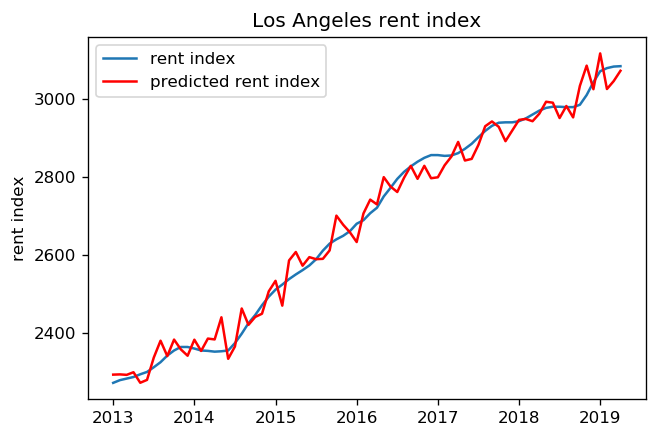

In [22]:
fig, ax = plt.subplots()
ax.set_ylabel('rent index')
ax.plot(LA_rent_train,label='rent index')
ax.plot(est_LA.predict(permit_train_LA), color = 'r',label= 'predicted rent index')
plt.xticks(range(0,73,12), ['2013', '2014', '2015', '2016', '2017' , '2018', '2019'])
plt.legend()
plt.title('Los Angeles rent index')
plt.show()

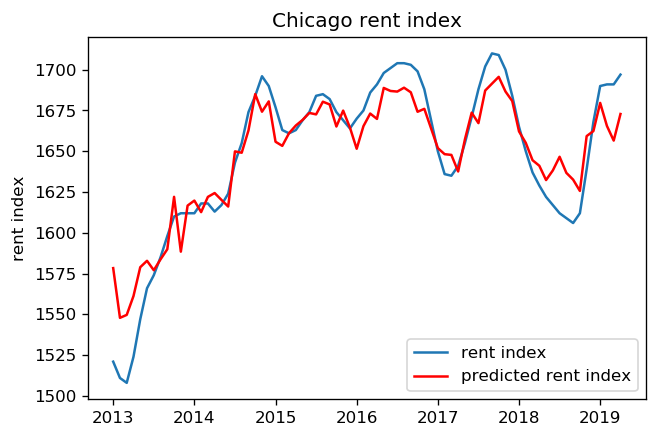

In [23]:
fig, ax = plt.subplots()
ax.set_ylabel('rent index')
ax.plot(CHI_rent_train,label='rent index')
ax.plot(est_CHI.predict(permit_train_CHI), color = 'r',label= 'predicted rent index')
plt.xticks(range(0,73,12), ['2013', '2014', '2015', '2016', '2017' , '2018', '2019'])
plt.legend()
plt.title('Chicago rent index')
plt.show()

### Rent index of the previous month is available at the end of the current month, so May 2019 rent index is not avaiable yet on Zillow. Since the building construction permit data is updated everyday, we can use the model to predict the rent index at the end of May.  

In [24]:
print ("May 2019 rent index for Los Angeles: {:.0f}".format(*est_LA.predict(permit_May2019_LA)))
print ("May 2019 rent index for Chicago: {:.0f}".format(*est_CHI.predict(permit_May2019_CHI)))

May 2019 rent index for Los Angeles: 3082
May 2019 rent index for Chicago: 1664


### The model above only considers the number of different types of permits, however the location is also very import. It's reasonable to assume that the building construction in residential has more impact on the rent index. The following model takes zip code into account.

In [25]:
zip_LA=df_LA["Zip Code"].unique()
permit_train_LA_zip=[]
for year in range(2013,2019):
    for month in range(1,13):
        if month!=12:
            temp=df_LA[(df_LA["Issue Date"]>=datetime(year,month,1)) & (df_LA["Issue Date"]<datetime(year,month+1,1))].groupby('Zip Code').size()
        else:
            temp=df_LA[(df_LA["Issue Date"]>=datetime(year,month,1)) & (df_LA["Issue Date"]<datetime(year+1,1,1))].groupby('Zip Code').size()
        row=[]
        for zipcode in zip_LA:
            if zipcode in temp:
                row.append(temp[zipcode])
            else:
                row.append(0)
        permit_train_LA_zip.append(row)

for month in range(1,5):
    temp=df_LA[(df_LA["Issue Date"]>=datetime(year,month,1)) & (df_LA["Issue Date"]<datetime(year,month+1,1))].groupby('Zip Code').size()
    row=[]
    for zipcode in zip_LA:
        if zipcode in temp:
            row.append(temp[zipcode])
        else:
            row.append(0)
    permit_train_LA_zip.append(row)
        
temp=df_LA[(df_LA["Issue Date"]>=datetime(2019,5,1)) & (df_LA["Issue Date"]<datetime(2019,6,1))].groupby('Zip Code').size()
permit_May2019_LA_zip=[]
row=[]
for zipcode in zip_LA:
    if zipcode in temp:
        row.append(temp[zipcode])
    else:
        row.append(0)
permit_May2019_LA_zip.append(row)

In [26]:
zip_CHI=df_CHI["Zip Codes"].unique()
permit_train_CHI_zip=[]
for year in range(2013,2019):
    for month in range(1,13):
        if month!=12:
            temp=df_CHI[(df_CHI["         ISSUE_DATE"]>=datetime(year,month,1)) & (df_CHI["         ISSUE_DATE"]<datetime(year,month+1,1))].groupby('Zip Codes').size()
        else:
            temp=df_CHI[(df_CHI["         ISSUE_DATE"]>=datetime(year,month,1)) & (df_CHI["         ISSUE_DATE"]<datetime(year+1,1,1))].groupby('Zip Codes').size()
        row=[]
        for zipcode in zip_CHI:
            if zipcode in temp:
                row.append(temp[zipcode])
            else:
                row.append(0)
        permit_train_CHI_zip.append(row)

for month in range(1,5):
    temp=df_CHI[(df_CHI["         ISSUE_DATE"]>=datetime(year,month,1)) & (df_CHI["         ISSUE_DATE"]<datetime(year,month+1,1))].groupby('Zip Codes').size()
    row=[]
    for zipcode in zip_CHI:
        if zipcode in temp:
            row.append(temp[zipcode])
        else:
            row.append(0)
    permit_train_CHI_zip.append(row)
        
temp=df_CHI[(df_CHI["         ISSUE_DATE"]>=datetime(2019,5,1)) & (df_CHI["         ISSUE_DATE"]<datetime(2019,6,1))].groupby('Zip Codes').size()
permit_May2019_CHI_zip=[]
row=[]
for zipcode in zip_CHI:
    if zipcode in temp:
        row.append(temp[zipcode])
    else:
        row.append(0)
permit_May2019_CHI_zip.append(row)

In [27]:
est_LA_zip = Pipeline([
    ('res', residual())    
    ])
est_CHI_zip = Pipeline([
    ('res', residual())    
    ])

In [28]:
est_LA_zip.fit(permit_train_LA_zip, LA_rent_train)
est_LA_zip.score(permit_train_LA_zip, LA_rent_train)

0.9940615752052621

In [29]:
est_CHI_zip.fit(permit_train_CHI_zip, CHI_rent_train)
est_CHI_zip.score(permit_train_CHI_zip, CHI_rent_train)

0.9655459003801822

### The  $R^2$  value of the model is 0.99 for Los Angeles, and 0.97 for Chicago

### The seoncd model generates smoother curves, and looks better than the first model

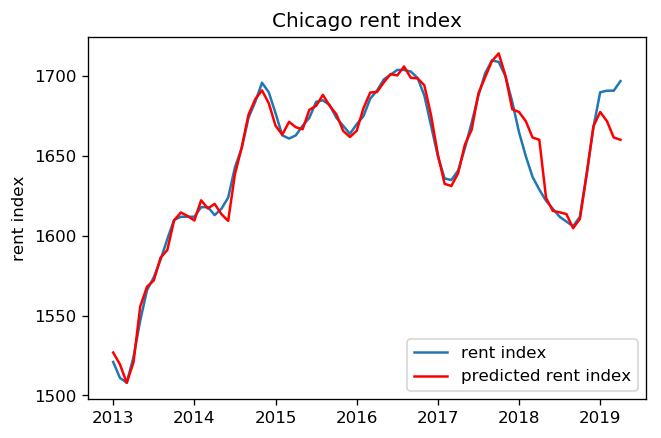

In [30]:
fig, ax = plt.subplots()
ax.set_ylabel('rent index')
ax.plot(CHI_rent_train,label='rent index')
ax.plot(est_CHI_zip.predict(permit_train_CHI_zip), color = 'r',label= 'predicted rent index')
plt.xticks(range(0,73,12), ['2013', '2014', '2015', '2016', '2017' , '2018', '2019'])
plt.legend()
plt.title('Chicago rent index')
plt.show()

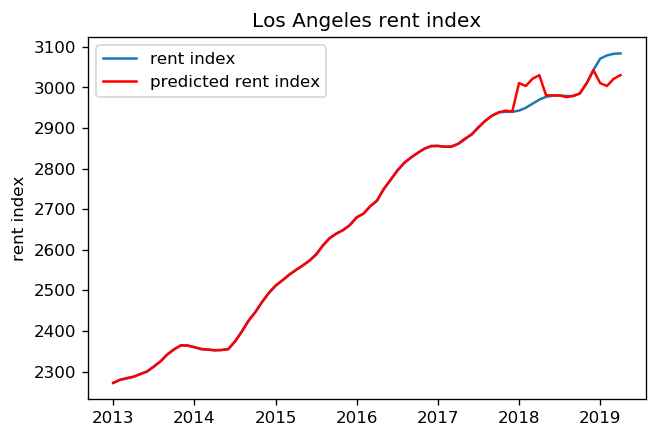

In [31]:
fig, ax = plt.subplots()
ax.set_ylabel('rent index')
ax.plot(LA_rent_train,label='rent index')
ax.plot(est_LA_zip.predict(permit_train_LA_zip), color = 'r',label= 'predicted rent index')
plt.xticks(range(0,73,12), ['2013', '2014', '2015', '2016', '2017' , '2018', '2019'])
plt.legend()
plt.title('Los Angeles rent index')
plt.show()

In [32]:
print ("May 2019 rent index for Los Angeles: {:.0f}".format(*est_LA_zip.predict(permit_May2019_LA_zip)))
print ("May 2019 rent index for Chicago: {:.0f}".format(*est_CHI_zip.predict(permit_May2019_CHI_zip)))

May 2019 rent index for Los Angeles: 3197
May 2019 rent index for Chicago: 1553


### To conclude, the rent price level of a city often fluctuates over time. For some cities like Chicago, the fluctuation is very large and hard to be predicted from general population or economy data.  This project shows that the buiding construction permit data can be used to precisely predict the change in rent price level. The open source permit data is accessible for most US cities, and it's updated everyday so it's easy to predict the rent price level of a city in the near future. 